In [40]:
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim
import matplotlib.pyplot as plt 
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms, models



In [41]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [42]:
transformation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
    ])

In [43]:
train_data = ImageFolder(r"D:\tekwill_uroki\AI\AI_zima\CNN\dataset\training_set", transform=transformation)
test_data = ImageFolder(r"D:\tekwill_uroki\AI\AI_zima\CNN\dataset\test_set", transform=transformation)

In [44]:
import cv2

In [45]:
cv2.imshow("img", (train_data[10][0]).permute(1,2,0).numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


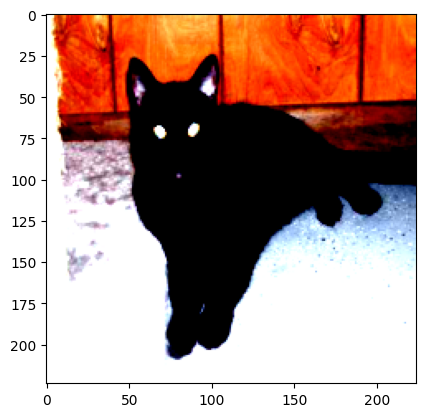

In [46]:
plt.imshow((train_data[10][0]).permute(1,2,0))


In [47]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3,32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,1)

    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))

        return out


In [48]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        model.train()
        for example, labels in train_loader:
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)
            
            labels = labels.unsqueeze(1)
            
            output = model(example.float())
            loss = loss_fn(output, labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy), (test_loader, test_accuracy)]:
                correct = 0
                total = 0
                
                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)
                    
                    outputs = model(examples.float())
                    predicted = torch.round(outputs)
                    
                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
                print(f"correct - {correct}")
                print(f"total - {total}")
                accuracy[epoch] = correct / total
        print(f"EPOCH - {epoch+1}\n Train Accuracy - {train_accuracy[epoch]} \n Test Accuracy - {test_accuracy[epoch]}")
    if print_plot:
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [49]:
import numpy as np
train_data = torch.utils.data.Subset(train_data, np.random.choice(len(train_data), 1000, replace=False))
test_data = torch.utils.data.Subset(test_data, np.random.choice(len(test_data), 200, replace=False))


In [50]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

correct - 513
total - 1000
correct - 90
total - 200
EPOCH - 1
 Train Accuracy - 0.5130000114440918 
 Test Accuracy - 0.44999998807907104
correct - 622
total - 1000
correct - 116
total - 200
EPOCH - 2
 Train Accuracy - 0.621999979019165 
 Test Accuracy - 0.5799999833106995
correct - 622
total - 1000
correct - 121
total - 200
EPOCH - 3
 Train Accuracy - 0.621999979019165 
 Test Accuracy - 0.6050000190734863
correct - 713
total - 1000
correct - 129
total - 200
EPOCH - 4
 Train Accuracy - 0.7129999995231628 
 Test Accuracy - 0.6449999809265137
correct - 704
total - 1000
correct - 111
total - 200
EPOCH - 5
 Train Accuracy - 0.7039999961853027 
 Test Accuracy - 0.5550000071525574
correct - 928
total - 1000
correct - 123
total - 200
EPOCH - 6
 Train Accuracy - 0.9279999732971191 
 Test Accuracy - 0.6150000095367432
correct - 977
total - 1000
correct - 138
total - 200
EPOCH - 7
 Train Accuracy - 0.9769999980926514 
 Test Accuracy - 0.6899999976158142
correct - 984
total - 1000
correct - 135
to

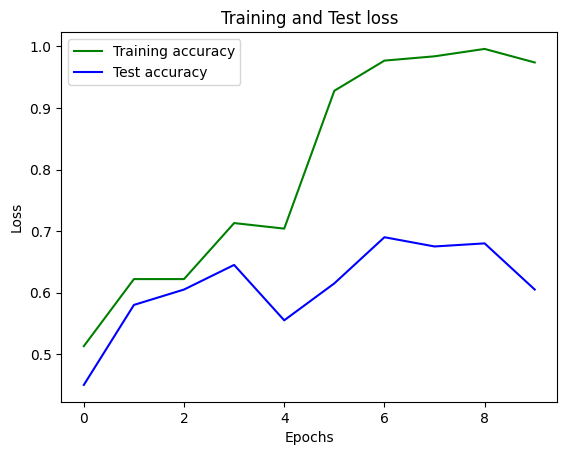

In [51]:
learning_rate = 1e-3

model = Net().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)